In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
from IPython.display import display
pd.set_option('display.max_columns', None)
from sklearn.metrics import confusion_matrix,recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay
)
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv(r"C:\Users\Admin\Documents\ENSSEA\ML\exam.py\data_set.csv")


<span style="color: yellow;">Section Afor Exploratory Data Analysis (EDA)</span>

In [3]:
df.head()

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target
0,Id_eqz61wz7yn,2022-02-23,2,studying,NaN,Rural,Mpumalanga,1.0,0.0,0.0,3.0,0 - 29 %,NaN,50 - 59 %,NaN,0 - 29 %,1,1,2000,5,0
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,427.0,Suburb,North West,1.0,0.0,0.0,1.0,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,1,1,1989,4,1
2,Id_9h0isj38y4,2022-08-08,3,other,NaN,Urban,Free State,1.0,0.0,0.0,NaN,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,0,1,1996,7,1
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810.0,Urban,Eastern Cape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,2000,1,0
4,Id_g4elxibjej,2023-03-22,4,studying,NaN,Urban,Limpopo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1998,12,0


some description for the data

In [4]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Person_id        4020 non-null   object 
 1   Survey_date      4020 non-null   object 
 2   Round            4020 non-null   int64  
 3   Status           4020 non-null   object 
 4   Tenure           2626 non-null   float64
 5   Geography        4020 non-null   object 
 6   Province         4020 non-null   object 
 7   Matric           3012 non-null   float64
 8   Degree           2189 non-null   float64
 9   Diploma          2211 non-null   float64
 10  Schoolquintile   2359 non-null   float64
 11  Math             997 non-null    object 
 12  Mathlit          1353 non-null   object 
 13  Additional_lang  2018 non-null   object 
 14  Home_lang        381 non-null    object 
 15  Science          732 non-null    object 
 16  Female           4020 non-null   int64  
 17  Sa_citizen    

In [5]:
df.describe()

,Round,Tenure,Matric,Degree,Diploma,Schoolquintile,Female,Sa_citizen,Birthyear,Birthmonth,Target
count,4020.000000,2626.000000,3012.000000,2189.000000,2211.000000,2359.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000
mean,3.129851,582.883092,0.850598,0.078118,0.081411,2.696482,0.564428,0.999502,1997.462935,5.344030,0.271891
std,0.978014,621.220657,0.356544,0.268418,0.273527,1.318409,0.495893,0.022302,4.378334,3.805916,0.444989
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1972.000000,1.000000,0.000000
25%,2.000000,95.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1995.000000,1.000000,0.000000
50%,3.000000,395.000000,1.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1999.000000,5.000000,0.000000
75%,4.000000,819.000000,1.000000,0.000000,0.000000,4.000000,1.000000,1.000000,2000.000000,9.000000,1.000000
max,4.000000,3560.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,2004.000000,12.000000,1.000000


In [6]:
df_types = df.dtypes.to_frame().reset_index()
df_types.columns = ['col', 'dtype']
df_types.groupby('dtype').size()

dtype
int64       6
float64     5
object     10
dtype: int64

In [7]:
num_cols = df.select_dtypes(include=['number']).columns

In [8]:
table= pd.crosstab(index=df["Round"], 
                             columns=[df["Geography"],
                                      df["Province"]] ,
                             )  
table

Geography        Rural                                                      \
Province  Eastern Cape Free State Gauteng KwaZulu-Natal Limpopo Mpumalanga   
Round                                                                        
1                    2          0       1            11      16         11   
2                   16          3       9            47      32         33   
3                    9          1       8            24      50         31   
4                   16          7      10           113     124         99   

Geography                                             Suburb             \
Province  North West Northern Cape Western Cape Eastern Cape Free State   
Round                                                                     
1                  9             0            2            0          0   
2                 25             1            1           20          6   
3                 10             3            0           10          5   
4                 69             8            2           25         13   

Geography                                                                    \
Province  Gauteng KwaZulu-Natal Limpopo Mpumalanga North West Northern Cape   
Round                                                                         
1               2             3       0          2          2             0   
2              30            20       9         13          8             5   
3              22            17       9          5          3             1   
4              40            59      32         20          8             3   

Geography                     Urban                                           \
Province  Western Cape Eastern Cape Free State Gauteng KwaZulu-Natal Limpopo   
Round                                                                          
1                    0           15          8      78            29       6   
2                   13           99         48     256           124      27   
3                    9           38         37     295            99      29   
4                    6           79        128     419           310      87   

Geography                                                   
Province  Mpumalanga North West Northern Cape Western Cape  
Round                                                       
1                  8          5             5           25  
2                 26         23            15           66  
3                 30         20             8           55  
4                 85         79            36          100


<span style="color: red;">Univariate Analysis</span>



i use the function  of the course to help 

In [9]:
def univariate_analysis(df):


        num_cols = df.select_dtypes(include=['number']).columns
        
        for col in num_cols:
   
            fig, axes = plt.subplots(2, 2, figsize=(12, 10))
            fig.suptitle(f'Univariate Analysis for {col}', fontsize=16)
            
            # Bar Chart
            sns.barplot(
                x=df[col].value_counts().index, 
                y=df[col].value_counts().values, 
                palette="viridis", 
                ax=axes[0, 0]
            )
            axes[0, 0].set_title('Bar Chart')
            axes[0, 0].set_xlabel(col)
            axes[0, 0].set_ylabel('Frequency')
            
            # Box Plot
            sns.boxplot(y=df[col], palette="viridis", ax=axes[0, 1])
            axes[0, 1].set_title('Box Plot')
            axes[0, 1].set_xlabel(col)
            
            # Density Plot
            sns.kdeplot(df[col], fill=True, color="blue", alpha=0.6, ax=axes[1, 0])
            axes[1, 0].set_title('Density Plot')
            axes[1, 0].set_xlabel(col)
            axes[1, 0].set_ylabel('Density')
            
            # Histogram
            sns.histplot(df[col], kde=False, color="green", ax=axes[1, 1])
            axes[1, 1].set_title('Histogram')
            axes[1, 1].set_xlabel(col)
            axes[1, 1].set_ylabel('Frequency')
            
            # Adjust layout
            plt.tight_layout(rect=[0, 0, 1, 0.96])  
            
           

C:\Users\Admin\AppData\Local\Temp\ipykernel_16252\3578126104.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_16252\3578126104.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette="viridis", ax=axes[0, 1])
C:\Users\Admin\AppData\Local\Temp\ipykernel_16252\3578126104.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_16252\3578126104.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remov

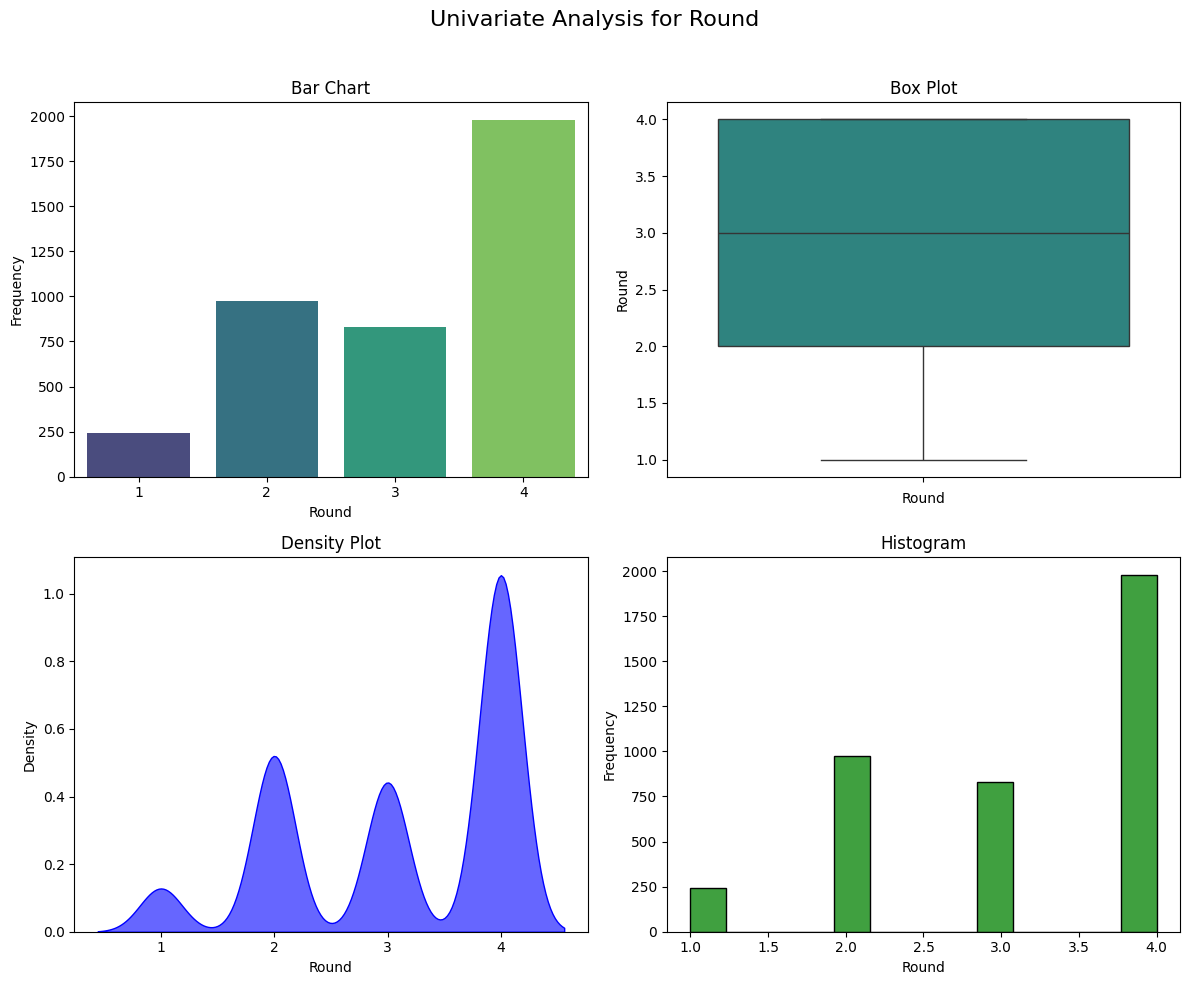

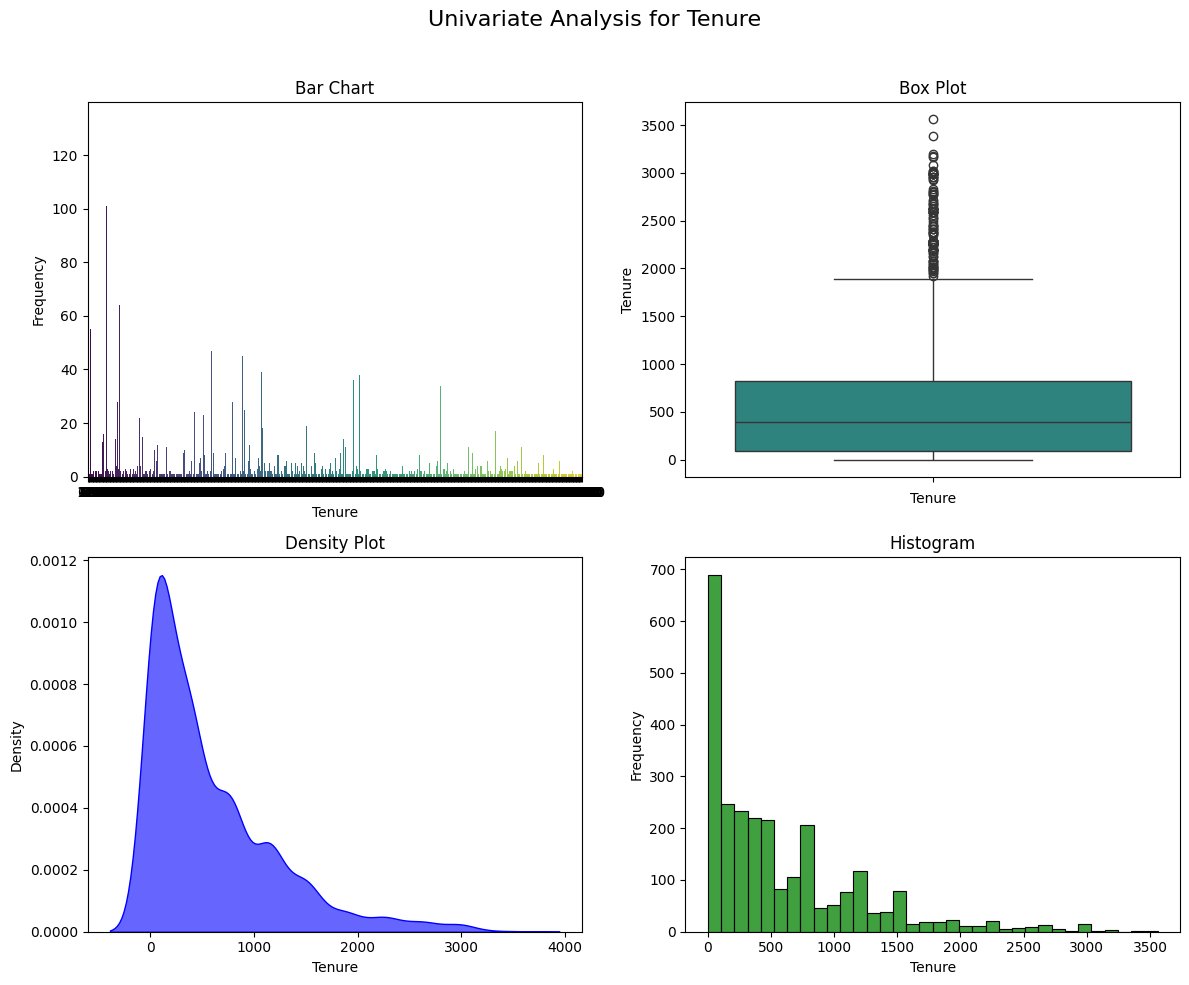

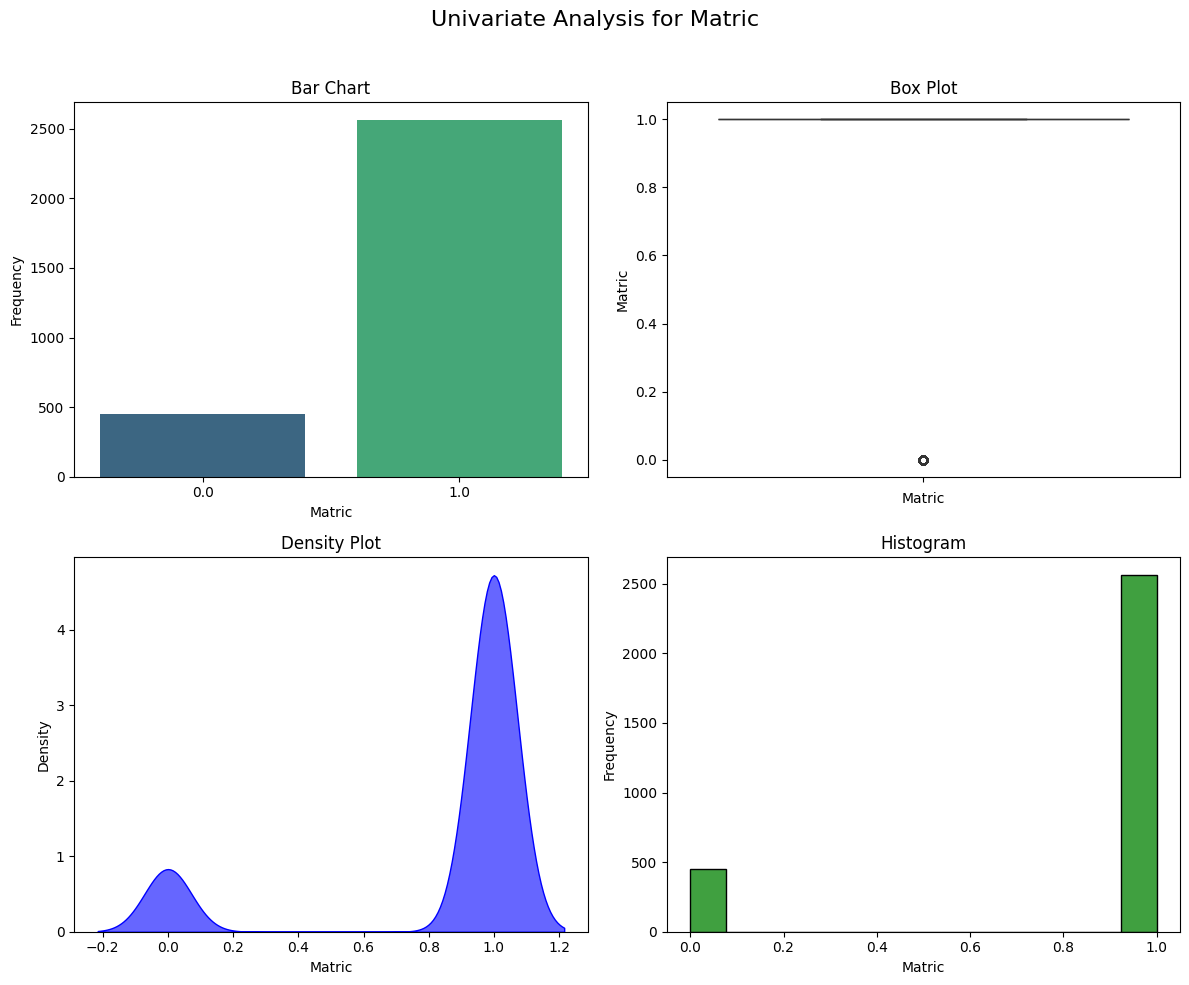

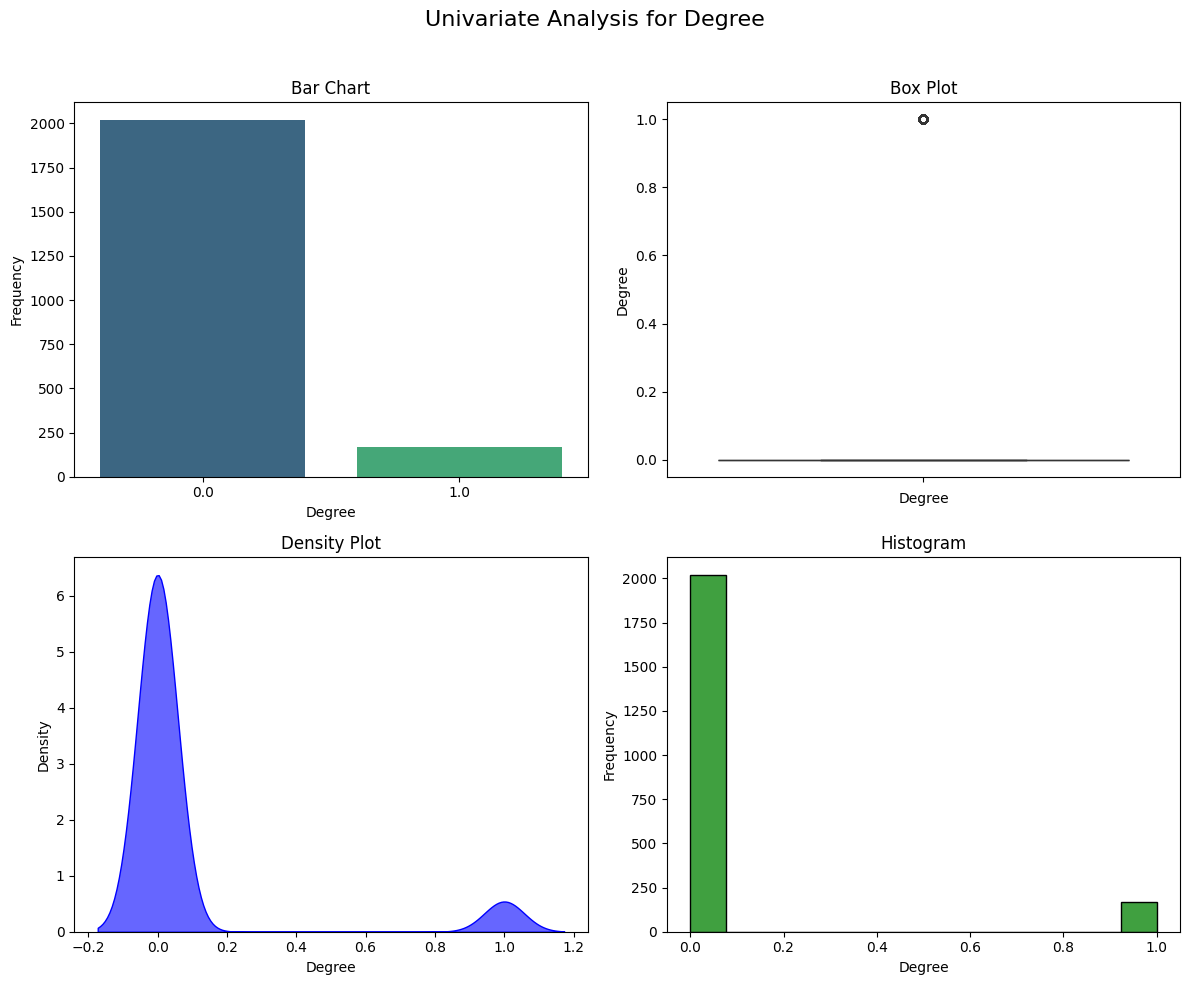

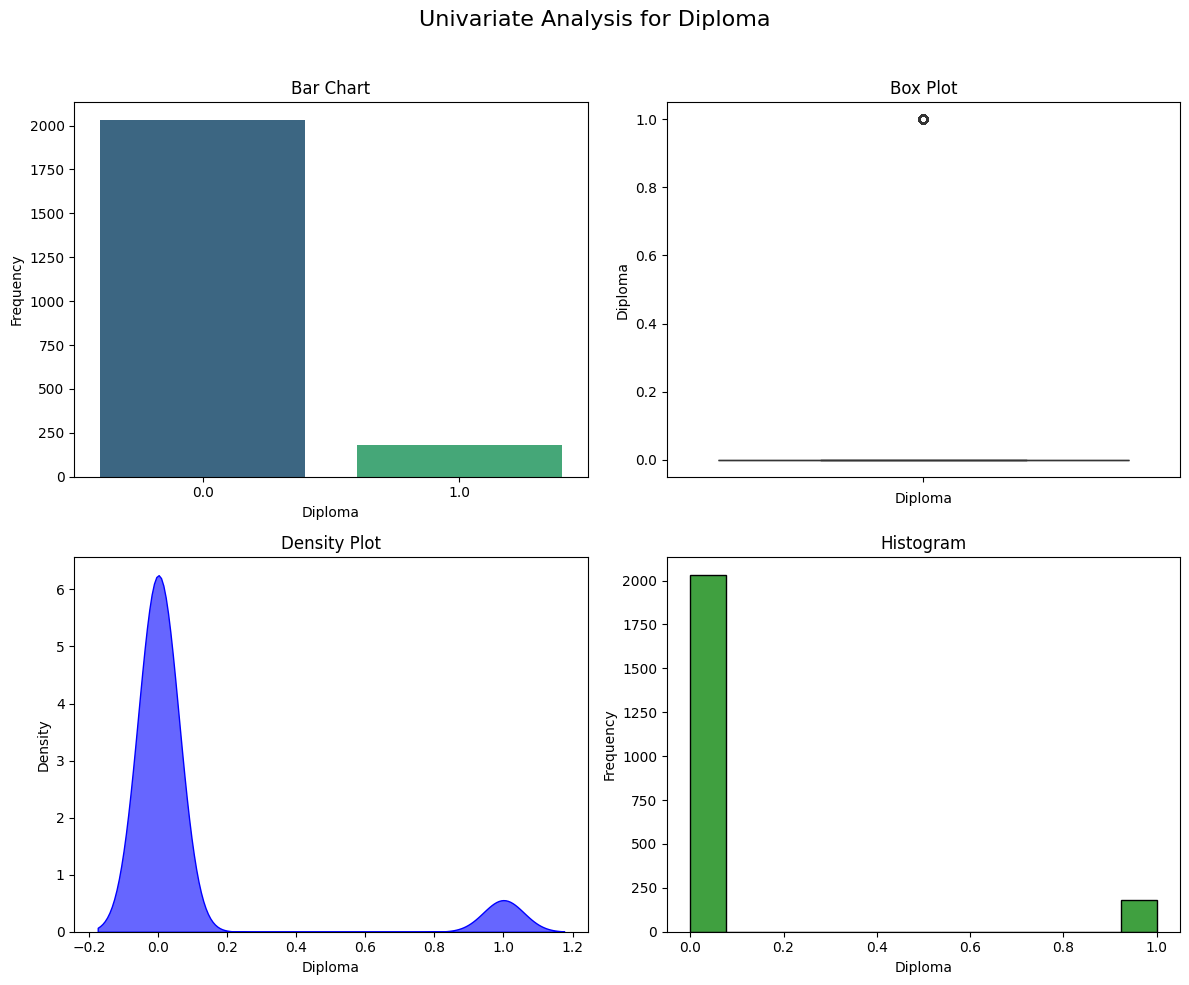

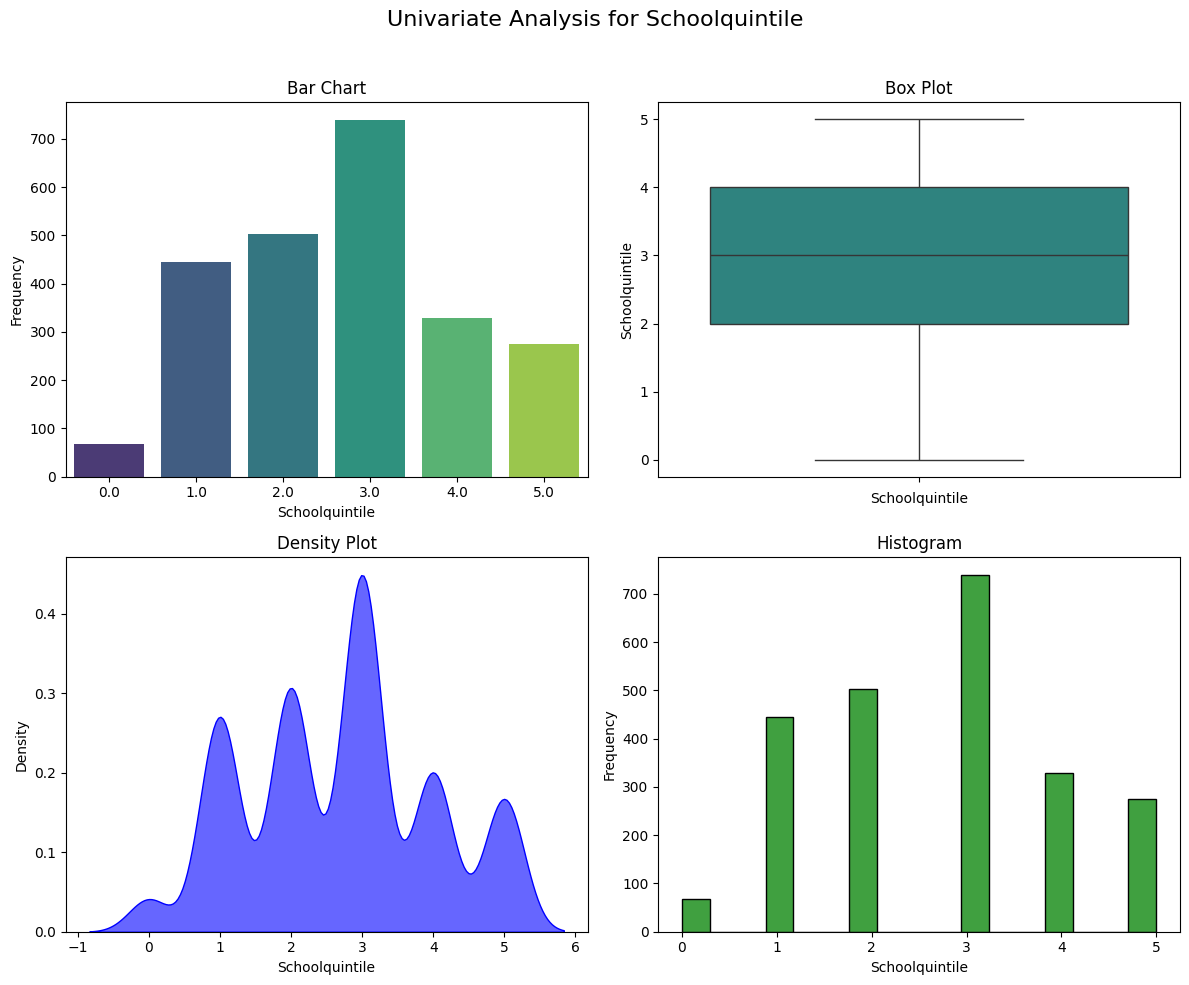

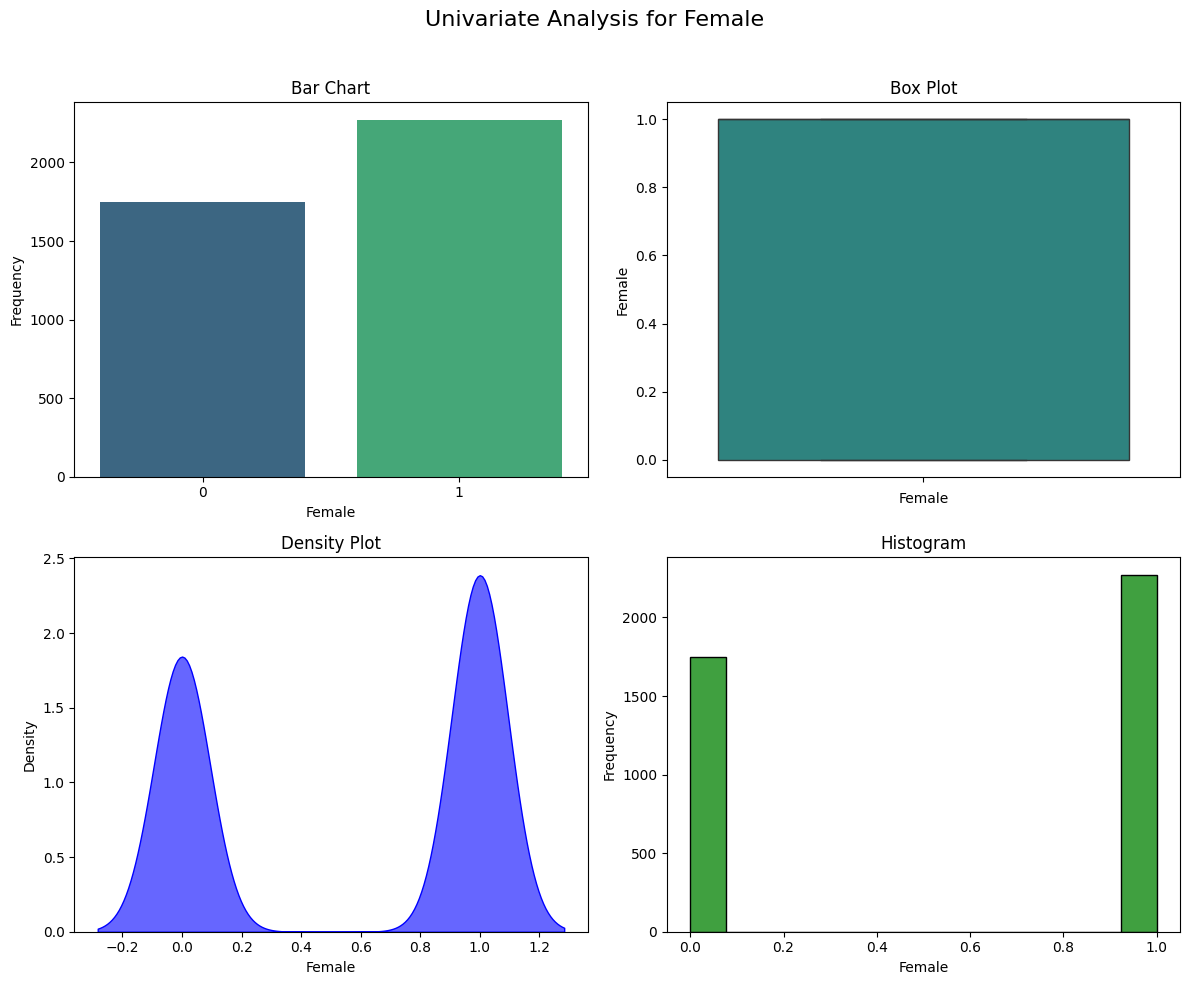

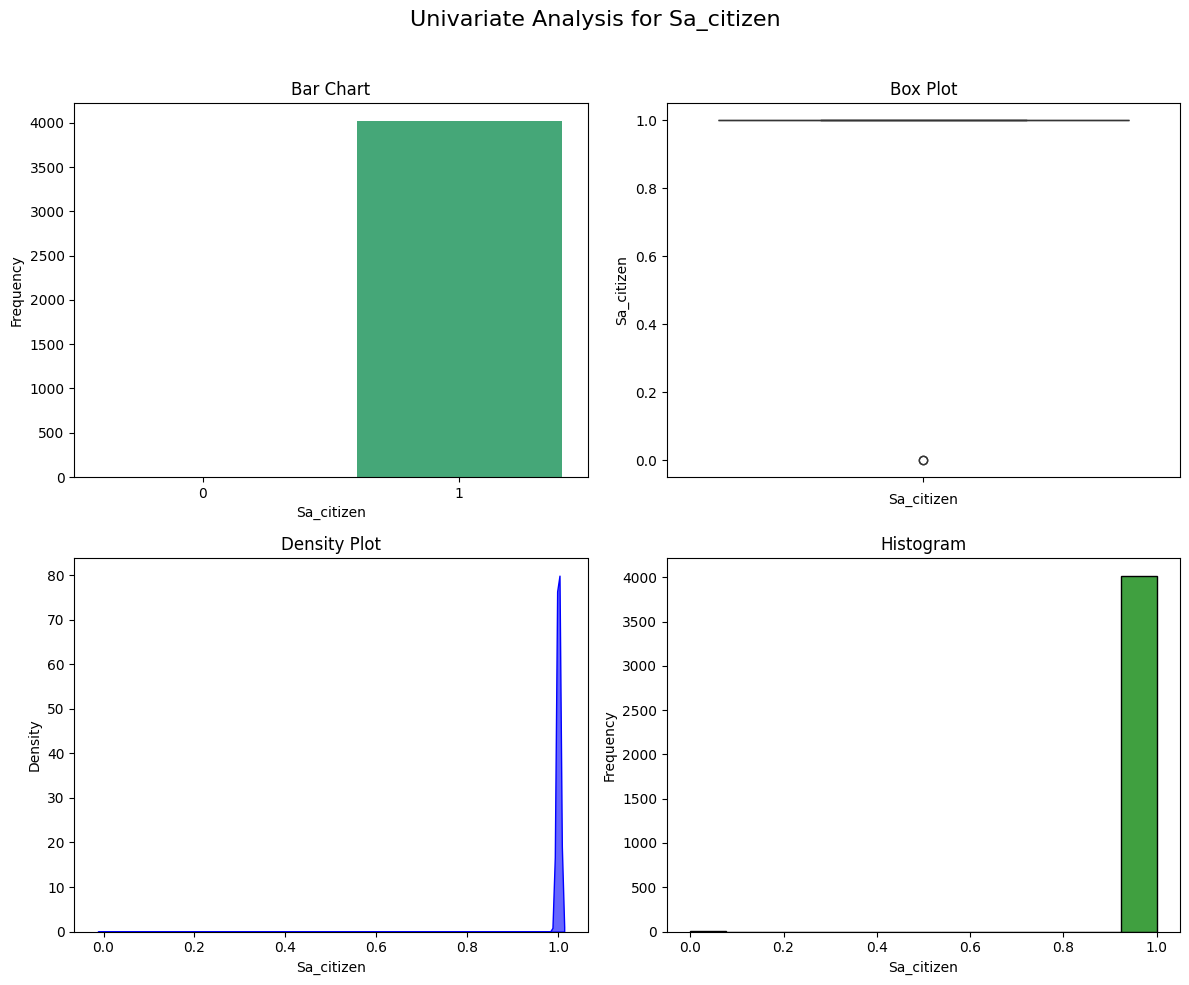

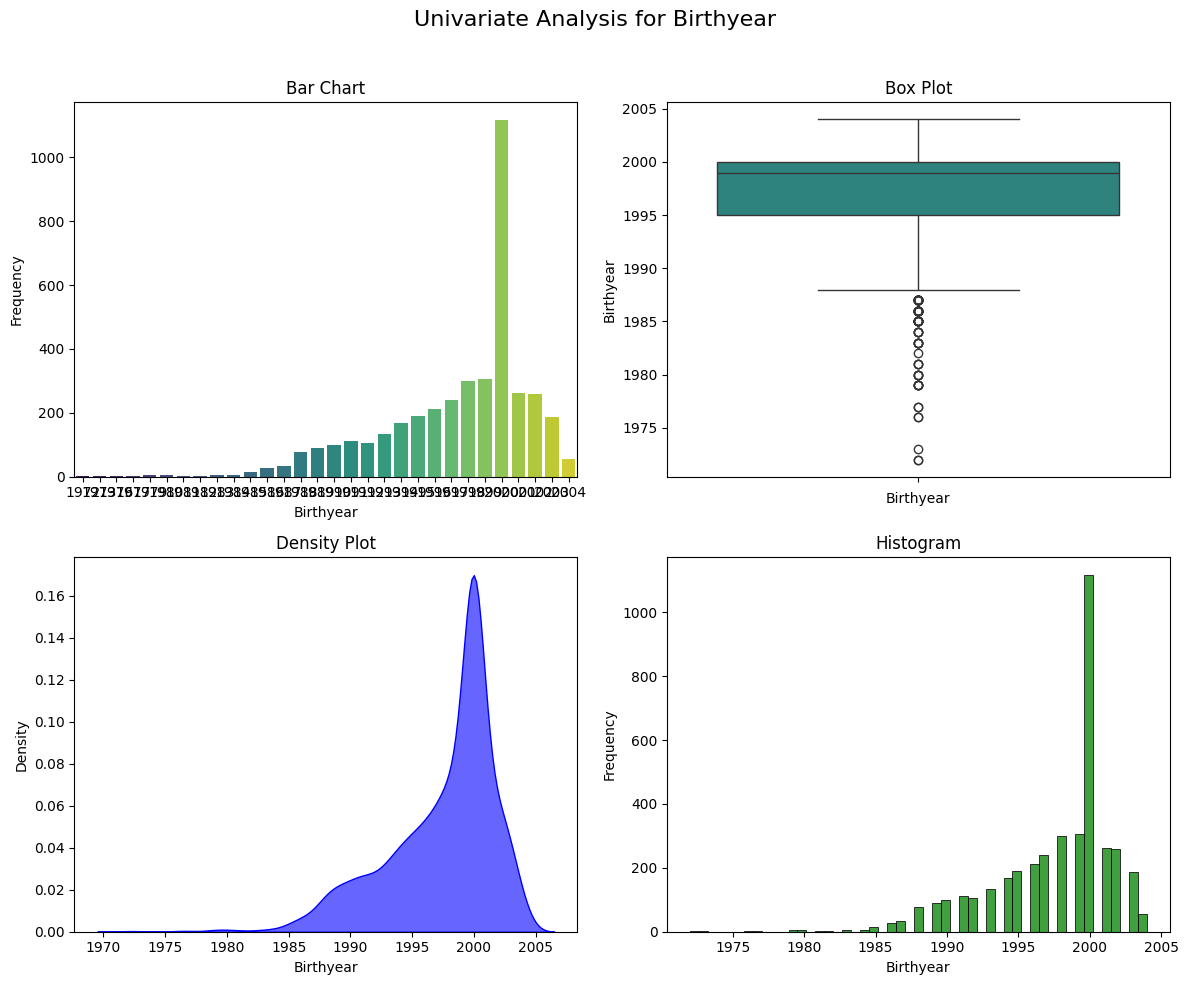

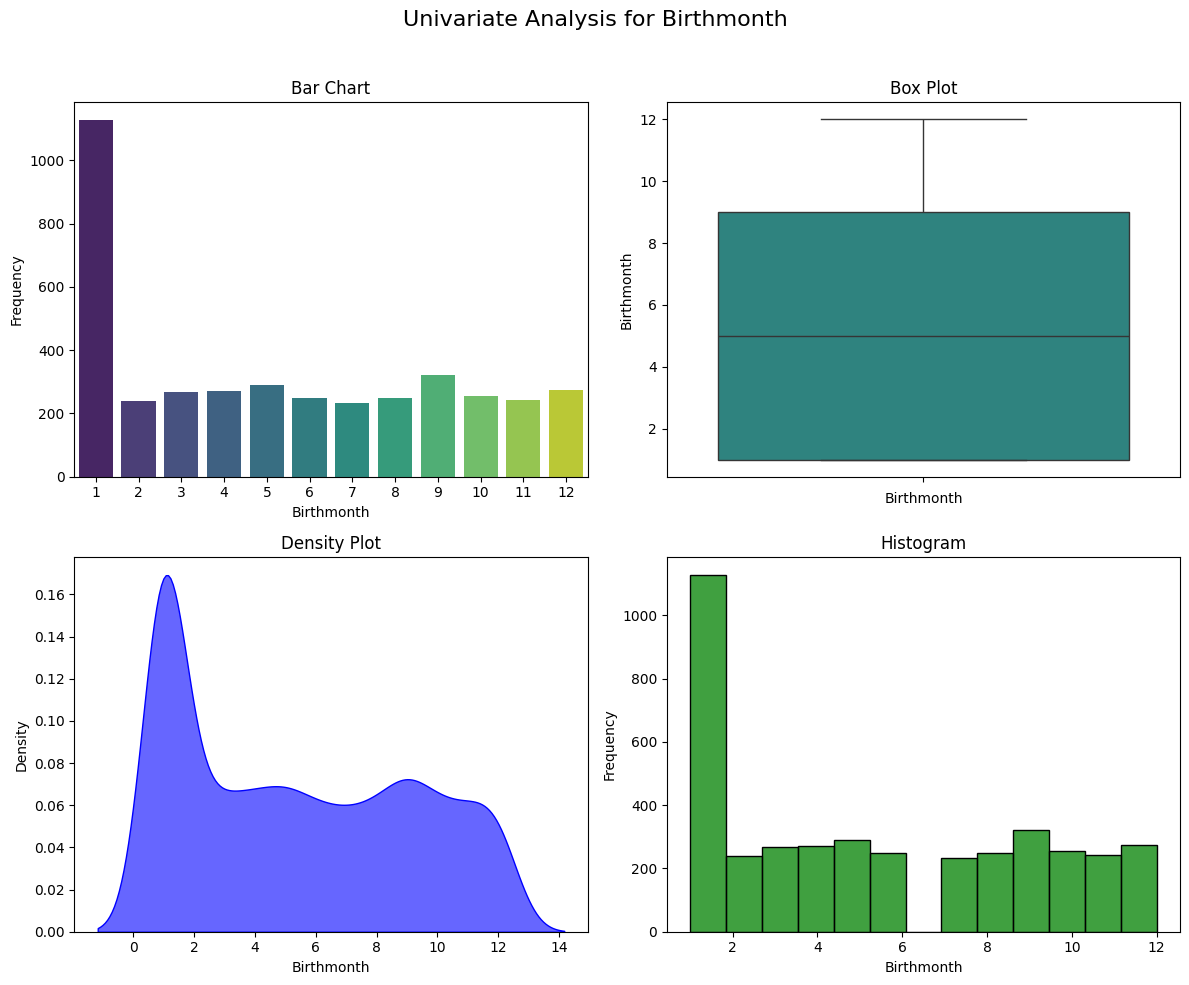

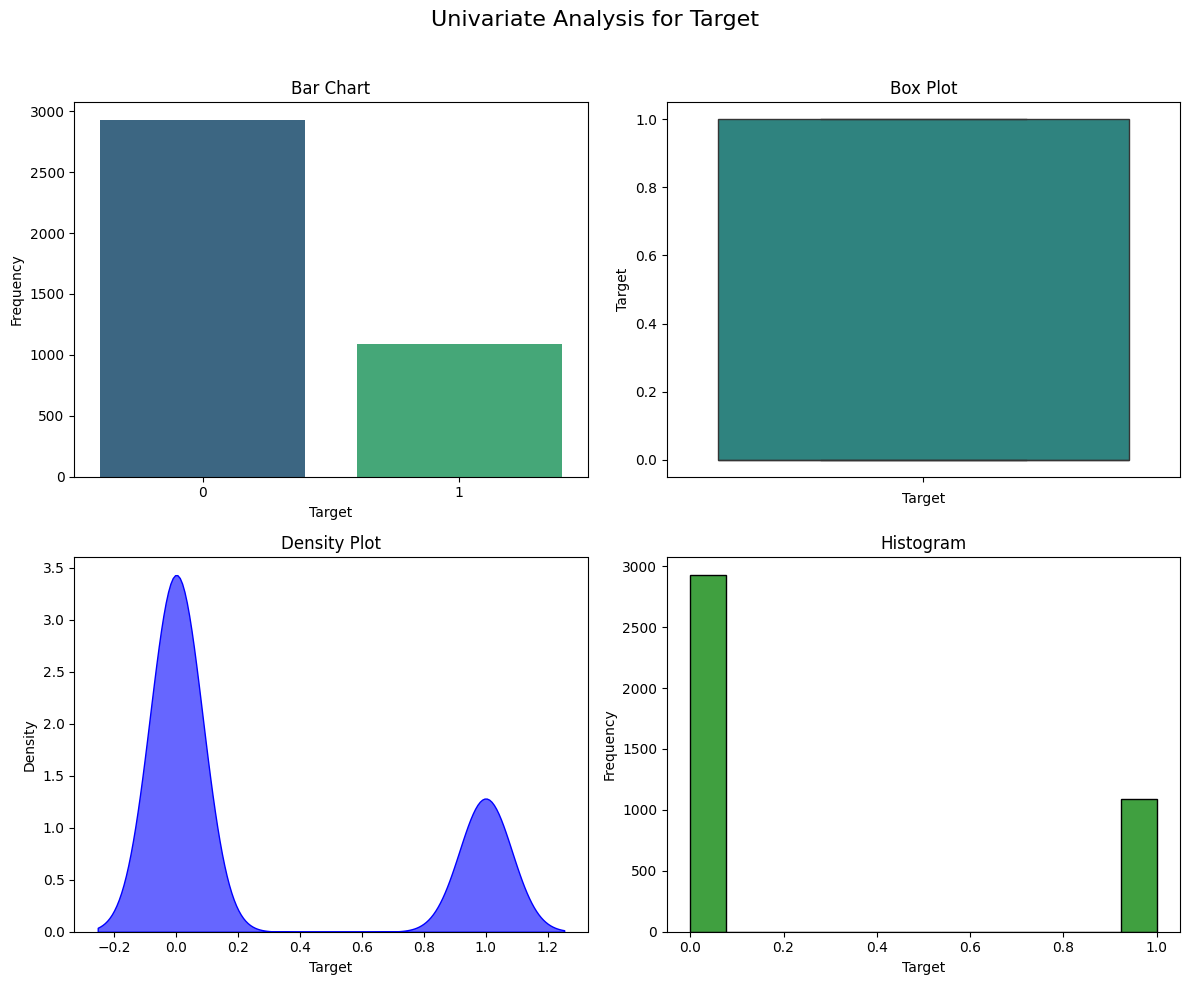

In [10]:
univariate_analysis(df)

<span style="color: red;">Bivariate Analysis</span>

Round     1    2    3     4
Target                     
0       154  608  532  1633
1        86  367  296   344


Text(0.5, 1.0, 'Target by round')

<Figure size 1000x1000 with 0 Axes>

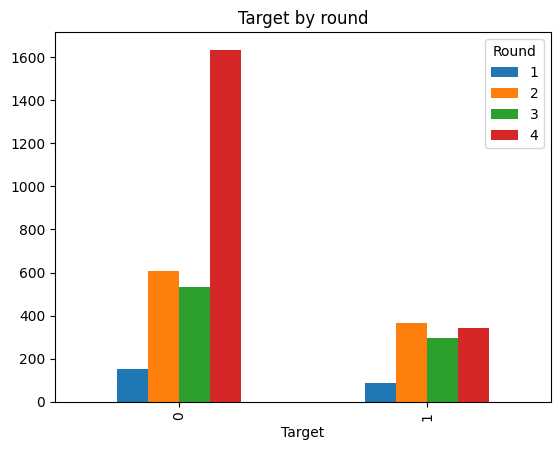

In [11]:

plt.figure(figsize=(10,10))
prd_gender=pd.crosstab(df['Target'],df['Round'] )
print(prd_gender)
ax=prd_gender.plot(kind='bar')
plt.title("Target by round")

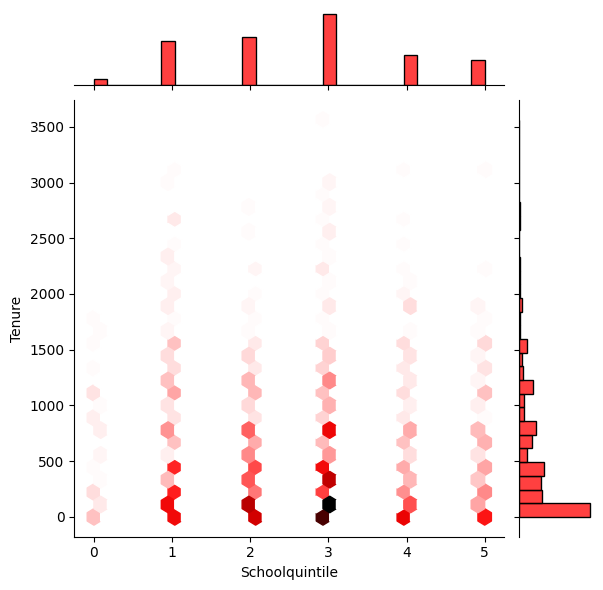

In [12]:
sns.jointplot(x = 'Schoolquintile',y = 'Tenure',data = df,color="red",kind='hex')

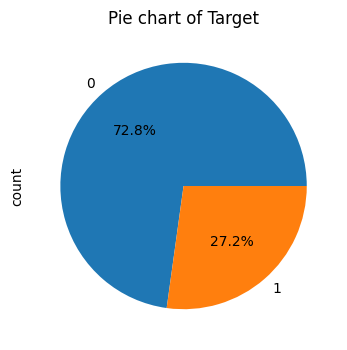

In [13]:

df['Target'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(8,4))
plt.title("Pie chart of Target")
plt.show()

so we must handl it 

<span style="color: red;">Bi+ multi variate Analysis</span>

<Figure size 1200x700 with 0 Axes>

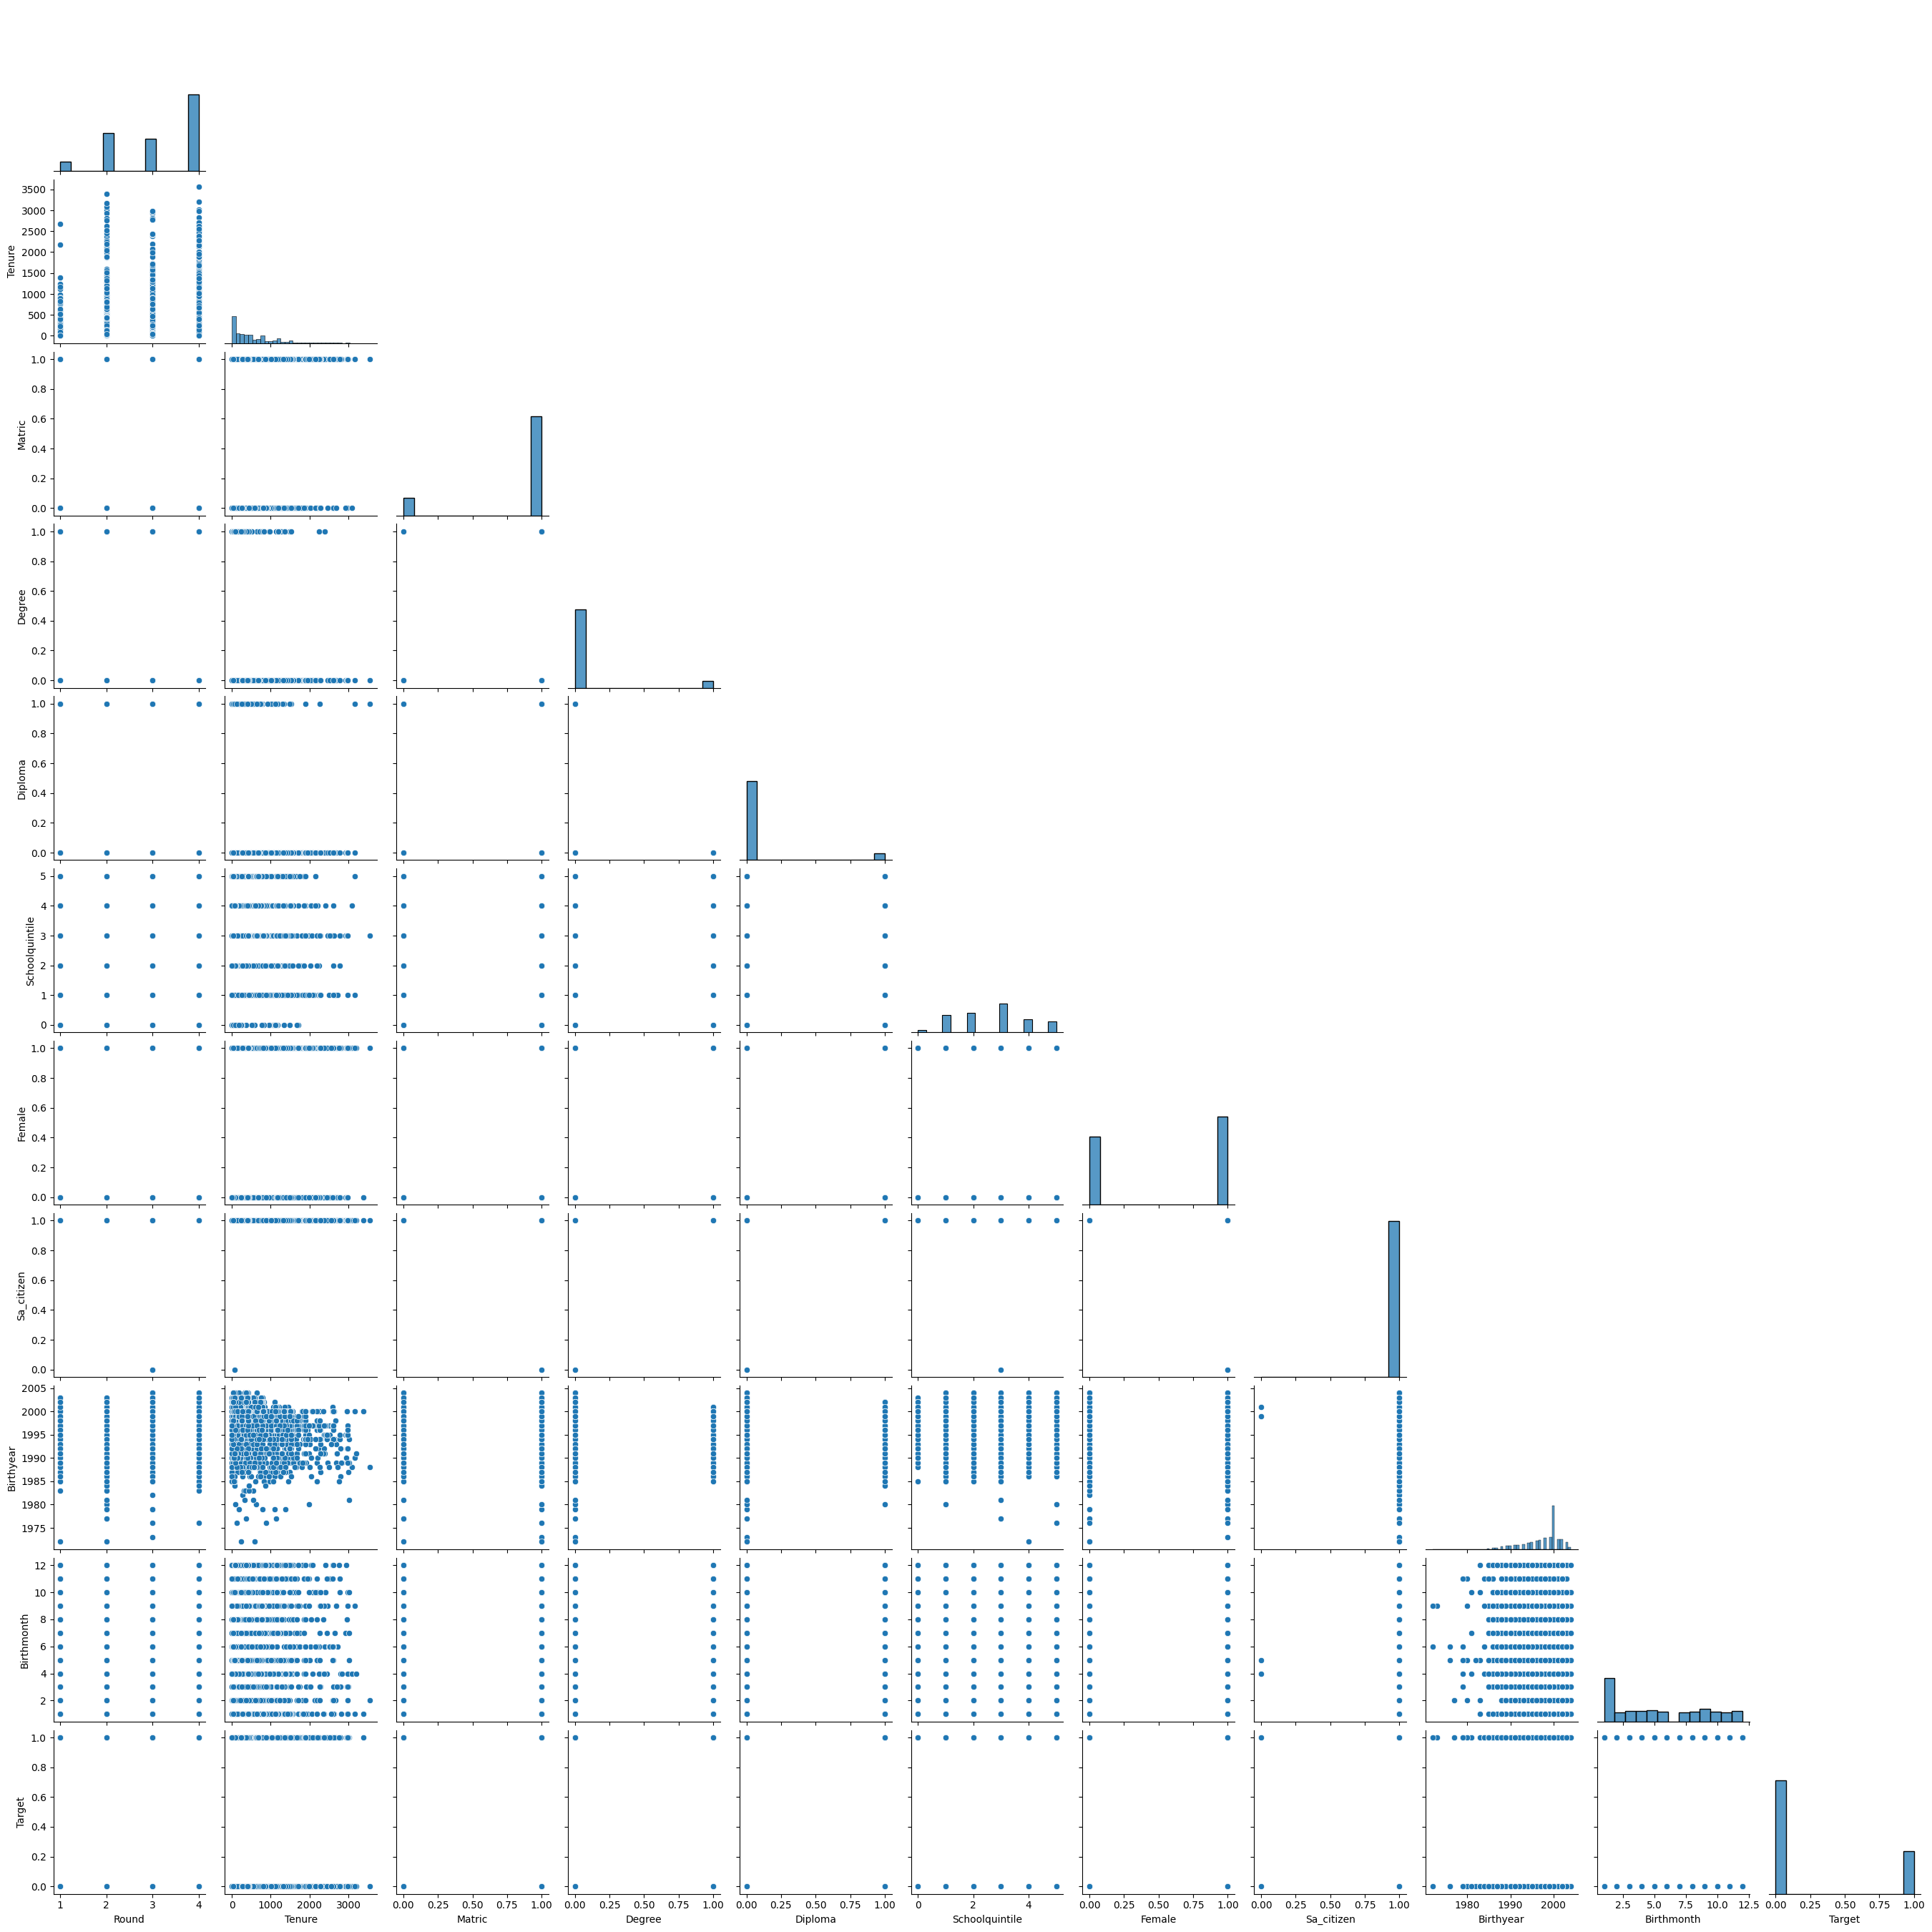

In [14]:
plt.figure(figsize=(12,7))
sns.pairplot(data=df,corner=True)


<span style="color: red;">data cleaning</span>

Person_id             0
Survey_date           0
Round                 0
Status                0
Tenure             1394
Geography             0
Province              0
Matric             1008
Degree             1831
Diploma            1809
Schoolquintile     1661
Math               3023
Mathlit            2667
Additional_lang    2002
Home_lang          3639
Science            3288
Female                0
Sa_citizen            0
Birthyear             0
Birthmonth            0
Target                0
dtype: int64


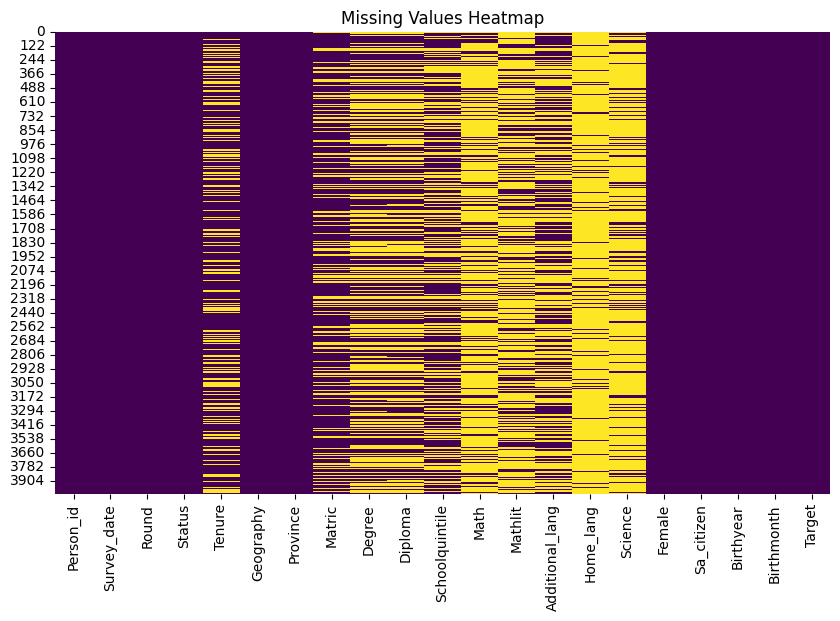

In [15]:

print(df.isnull().sum())
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [16]:
df.dtypes

Person_id           object
Survey_date         object
Round                int64
Status              object
Tenure             float64
Geography           object
Province            object
Matric             float64
Degree             float64
Diploma            float64
Schoolquintile     float64
Math                object
Mathlit             object
Additional_lang     object
Home_lang           object
Science             object
Female               int64
Sa_citizen           int64
Birthyear            int64
Birthmonth           int64
Target               int64
dtype: object

<span style="color: red;">We observe that all missing values in the columns Degree, Matric,Schoolquintile, and Diploma can be replaced with 0, as the absence of a value likely indicates that the individual did not obtain that qualification and other can be not taken exam yet .</span>

In [17]:
df['Degree'].fillna(0, inplace=True)
df['Matric'].fillna(0, inplace=True)
df['Diploma'].fillna(0, inplace=True)
df['Schoolquintile'].fillna(0, inplace=True)
df['Math'] = df['Math'].fillna('0')
df['Science'] = df['Science'].fillna('0')
df['Mathlit'] = df['Mathlit'].fillna('0')
df['Additional_lang'] = df['Additional_lang'].fillna('0')
df['Home_lang'] = df['Home_lang'].fillna('0')

df['Tenure'].fillna(df['Tenure'].mode()[0], inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_16252\2858167430.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Degree'].fillna(0, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16252\2858167430.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

Person_id          0
Survey_date        0
Round              0
Status             0
Tenure             0
Geography          0
Province           0
Matric             0
Degree             0
Diploma            0
Schoolquintile     0
Math               0
Mathlit            0
Additional_lang    0
Home_lang          0
Science            0
Female             0
Sa_citizen         0
Birthyear          0
Birthmonth         0
Target             0
dtype: int64


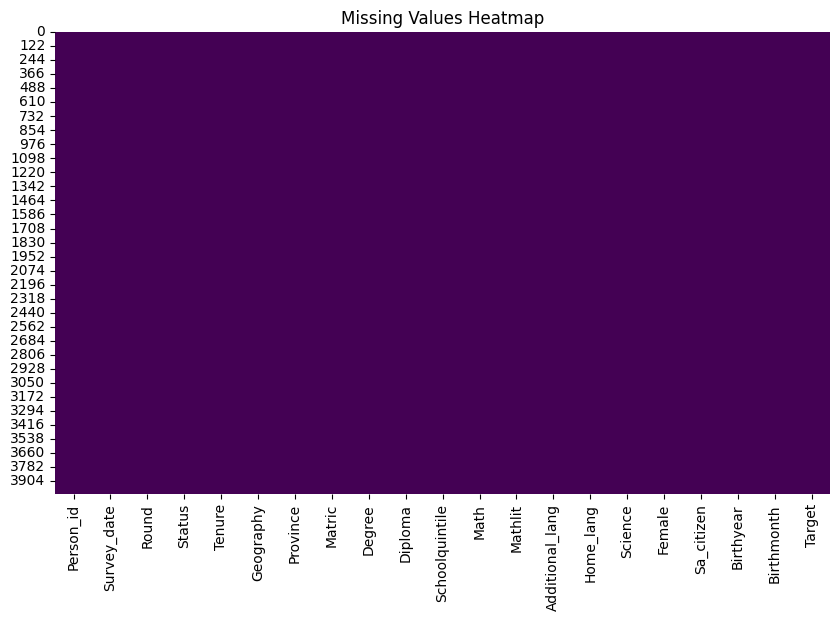

In [18]:
print(df.isnull().sum())
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


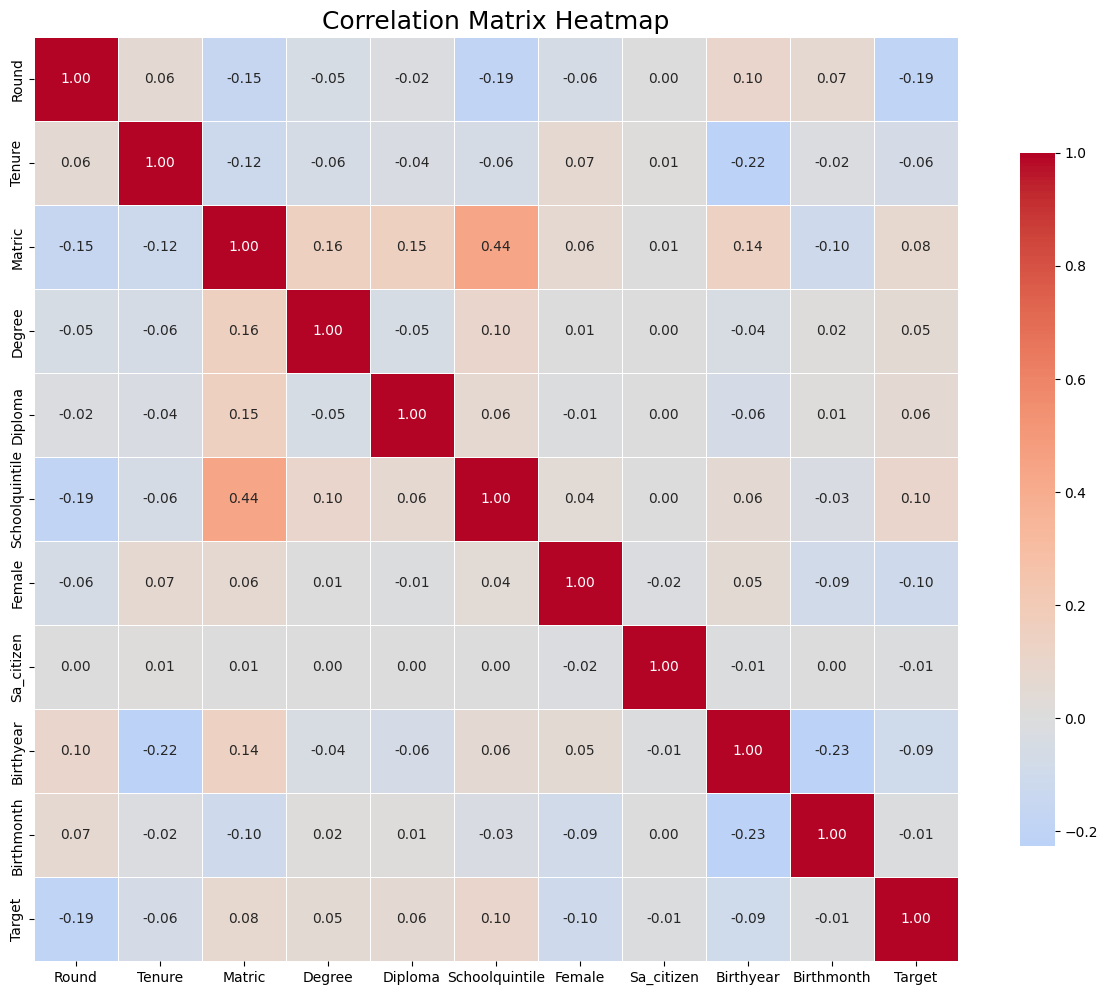

In [19]:
df_numeric = df.select_dtypes(include=[np.number])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True,
            linewidths=0.5, cbar_kws={"shrink": .75})
plt.title("Correlation Matrix Heatmap", fontsize=18)
plt.show()

In [20]:
df = df.drop(columns=['Person_id'])


In [21]:
df.head()   

,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target
0,2022-02-23,2,studying,0.0,Rural,Mpumalanga,1.0,0.0,0.0,3.0,0 - 29 %,0,50 - 59 %,0,0 - 29 %,1,1,2000,5,0
1,2023-02-06,4,unemployed,427.0,Suburb,North West,1.0,0.0,0.0,1.0,30 - 39 %,0,40 - 49 %,0,30 - 39 %,1,1,1989,4,1
2,2022-08-08,3,other,0.0,Urban,Free State,1.0,0.0,0.0,0.0,30 - 39 %,0,40 - 49 %,0,30 - 39 %,0,1,1996,7,1
3,2022-03-16,2,unemployed,810.0,Urban,Eastern Cape,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,2000,1,0
4,2023-03-22,4,studying,0.0,Urban,Limpopo,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1,1998,12,0


In [22]:
df.groupby('Target')['Target'].count()


Target
0    2927
1    1093
Name: Target, dtype: int64

In [23]:
df.dtypes

Survey_date         object
Round                int64
Status              object
Tenure             float64
Geography           object
Province            object
Matric             float64
Degree             float64
Diploma            float64
Schoolquintile     float64
Math                object
Mathlit             object
Additional_lang     object
Home_lang           object
Science             object
Female               int64
Sa_citizen           int64
Birthyear            int64
Birthmonth           int64
Target               int64
dtype: object


<span style="color: yellow;">Section b for Feature Engineering</span>

the first class

In [24]:
class feature:

 def __init__(self,df):
  self.df=df


 def engenerig(self):
  lab=LabelEncoder()
  self.df['Province'] = lab.fit_transform(self.df['Province'])
  self.df['Geography'] = lab.fit_transform(self.df['Geography'])
  self.df['Status'] = lab.fit_transform(self.df['Status'])
  self.df['Math'] = lab.fit_transform(self.df['Math'])
  self.df['Science'] = lab.fit_transform(self.df['Science'])
  self.df['Additional_lang'] = lab.fit_transform(self.df['Additional_lang'])
  self.df['Home_lang'] = lab.fit_transform(self.df['Home_lang'])
  self.df['Mathlit'] = lab.fit_transform(self.df['Mathlit'])
  if 'Survey_date' in self.df.columns:
    self.df['Survey_date'] = pd.to_datetime(self.df['Survey_date'], errors='coerce')
    self.df['year'] = self.df['Survey_date'].dt.year
    self.df['month'] = self.df['Survey_date'].dt.month
    self.df['day'] = self.df['Survey_date'].dt.day
    self.df = self.df.drop(columns=['Survey_date'])

  return self.df

In [25]:
feat = feature(df)
df = feat.engenerig()


In [26]:
df.dtypes

Round                int64
Status               int32
Tenure             float64
Geography            int32
Province             int32
Matric             float64
Degree             float64
Diploma            float64
Schoolquintile     float64
Math                 int32
Mathlit              int32
Additional_lang      int32
Home_lang            int32
Science              int32
Female               int64
Sa_citizen           int64
Birthyear            int64
Birthmonth           int64
Target               int64
year                 int32
month                int32
day                  int32
dtype: object

In [27]:
X = df.drop(['Target'], axis=1)
y = df['Target']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['Target'] = y_resampled


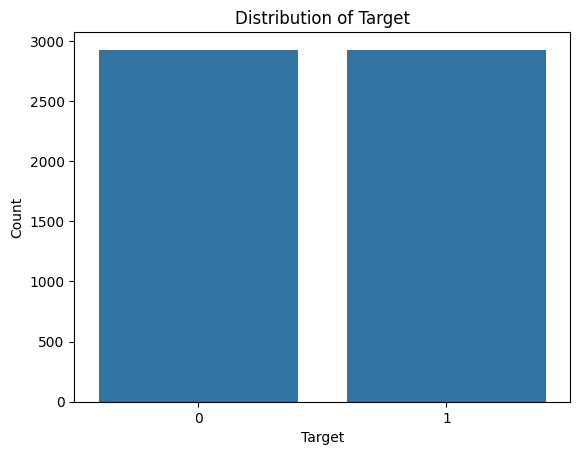

In [28]:
sns.countplot(x='Target', data=df_balanced)
plt.title('Distribution of Target')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [29]:
df_balanced.head()
df=df_balanced.copy()
df.groupby('Target')['Target'].count()

Target
0    2927
1    2927
Name: Target, dtype: int64

In [30]:
df.head()

,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,year,month,day,Target
0,2,3,0.0,0,5,1.0,0.0,0.0,3.0,1,0,3,0,1,1,1,2000,5,2022,2,23,0
1,4,4,427.0,1,6,1.0,0.0,0.0,1.0,2,0,2,0,2,1,1,1989,4,2023,2,6,1
2,3,1,0.0,2,1,1.0,0.0,0.0,0.0,2,0,2,0,2,0,1,1996,7,2022,8,8,1
3,2,4,810.0,2,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,2000,1,2022,3,16,0
4,4,3,0.0,2,4,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1,1998,12,2023,3,22,0


class 2

In [31]:
class feature2:

    def __init__(self, df):
        self.df = df

    def engenerig(self):
        self.df['f1']=self.df['Status'] / (self.df['Tenure']+1)
        self.df['f2']=(1.1 * self.df['Home_lang'] + self.df['Mathlit']) / 2
        self.df['f3']=self.df['Degree'] + self.df['Matric'] + self.df['Diploma']
        self.df['f4']=self.df['Math'] * self.df['Science']

        
        if 'Sa_citizen' in self.df.columns:
            self.df=self.df.drop(columns=['Sa_citizen'])

        return self.df


In [32]:
feat2=feature2(df)
df=feat2.engenerig()
df.head()

,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Birthyear,Birthmonth,year,month,day,Target,f1,f2,f3,f4
0,2,3,0.0,0,5,1.0,0.0,0.0,3.0,1,0,3,0,1,1,2000,5,2022,2,23,0,3.000000,0.0,1.0,1
1,4,4,427.0,1,6,1.0,0.0,0.0,1.0,2,0,2,0,2,1,1989,4,2023,2,6,1,0.009346,0.0,1.0,4
2,3,1,0.0,2,1,1.0,0.0,0.0,0.0,2,0,2,0,2,0,1996,7,2022,8,8,1,1.000000,0.0,1.0,4
3,2,4,810.0,2,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,2000,1,2022,3,16,0,0.004932,0.0,0.0,0
4,4,3,0.0,2,4,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1998,12,2023,3,22,0,3.000000,0.0,0.0,0


<span style="color: yellow;">Section C for  Machine Learning Modeling with OOP</span>

class 3 for model


In [33]:
class ml_model:

 def __init__(self,df,model):
  self.df=df
  self.X=self.df.drop(['Target'], axis=1)
  self.y=self.df['Target']
  self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X,self.y, test_size=0.2, random_state=42)
  self.model=model

 def mod(self):
    self.model.fit(self.X_train, self.y_train)



 def prediction(self):
  self.y_pred = self.model.predict(self.X_test)

 def evaluate(self):
    
  self.accuracy = accuracy_score(self.y_test, self.y_pred)
  print(f"Accuracy: {self.accuracy}")
  test_f1 = f1_score(self.y_test, self.y_pred)
  print(f"F1 Score: {test_f1}")
  print("Classification Report:")
  print(classification_report(self.y_test, self.y_pred))
  print("Confusion Matrix:")
  print(confusion_matrix(self.y_test, self.y_pred)) 
  

In [34]:
random = RandomForestClassifier(n_estimators=400, random_state=42)
ml = ml_model(df, random)
ml.mod()
ml.prediction()
ml.evaluate()

Accuracy: 0.8701964133219471
F1 Score: 0.8680555555555556
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       572
           1       0.90      0.83      0.87       599

    accuracy                           0.87      1171
   macro avg       0.87      0.87      0.87      1171
weighted avg       0.87      0.87      0.87      1171

Confusion Matrix:
[[519  53]
 [ 99 500]]


In [35]:
from catboost import CatBoostClassifier


cat = CatBoostClassifier()

ml = ml_model(df, cat)
ml.mod()
ml.prediction()
ml.evaluate()

Learning rate set to 0.019918
0:	learn: 0.6807689	total: 117ms	remaining: 1m 57s
1:	learn: 0.6687684	total: 124ms	remaining: 1m 1s
2:	learn: 0.6567714	total: 129ms	remaining: 43s
3:	learn: 0.6451436	total: 134ms	remaining: 33.5s
4:	learn: 0.6357081	total: 139ms	remaining: 27.6s
5:	learn: 0.6241513	total: 144ms	remaining: 23.8s
6:	learn: 0.6153909	total: 148ms	remaining: 21.1s
7:	learn: 0.6079963	total: 153ms	remaining: 18.9s
8:	learn: 0.6015203	total: 157ms	remaining: 17.3s
9:	learn: 0.5924574	total: 161ms	remaining: 16s
10:	learn: 0.5846517	total: 166ms	remaining: 14.9s
11:	learn: 0.5779929	total: 170ms	remaining: 14s
12:	learn: 0.5696565	total: 174ms	remaining: 13.2s
13:	learn: 0.5615370	total: 178ms	remaining: 12.6s
14:	learn: 0.5558364	total: 183ms	remaining: 12s
15:	learn: 0.5503735	total: 186ms	remaining: 11.5s
16:	learn: 0.5448795	total: 190ms	remaining: 11s
17:	learn: 0.5390491	total: 194ms	remaining: 10.6s
18:	learn: 0.5336894	total: 198ms	remaining: 10.2s
19:	learn: 0.5286932

In [36]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier( random_state=42)


ml = ml_model(df, lgb_model)
ml.mod()
ml.prediction()
ml.evaluate()

[LightGBM] [Info] Number of positive: 2328, number of negative: 2355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1586
[LightGBM] [Info] Number of data points in the train set: 4683, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497117 -> initscore=-0.011531
[LightGBM] [Info] Start training from score -0.011531
Accuracy: 0.8821520068317678
F1 Score: 0.8812392426850258
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       572
           1       0.91      0.85      0.88       599

    accuracy                           0.88      1171
   macro avg       0.88      0.88      0.88      1171
weighted avg       0.88      0.88      0.88      1171

Confusion Matrix:
[[521  51]
 [ 87 51

In [37]:
XGB = XGBClassifier(n_estimators=700, learning_rate=0.01, max_depth=15, subsample=0.90, colsample_bytree=0.9,
   
    min_child_weight=1,
    reg_lambda=1,
    gamma=0.5,
    reg_alpha=0.01,
    scale_pos_weight=1,  
    max_delta_step=3,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42)

ml = ml_model(df, XGB)
ml.mod()
ml.prediction()
ml.evaluate()

Accuracy: 0.892399658411614
F1 Score: 0.8921232876712328
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       572
           1       0.92      0.87      0.89       599

    accuracy                           0.89      1171
   macro avg       0.89      0.89      0.89      1171
weighted avg       0.89      0.89      0.89      1171

Confusion Matrix:
[[524  48]
 [ 78 521]]


In [38]:
knn = KNeighborsClassifier(n_neighbors=2 ,p=1) 


ml = ml_model(df, knn)
ml.mod()
ml.prediction()
ml.evaluate()

Accuracy: 0.8582408198121264
F1 Score: 0.8573883161512027
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       572
           1       0.88      0.83      0.86       599

    accuracy                           0.86      1171
   macro avg       0.86      0.86      0.86      1171
weighted avg       0.86      0.86      0.86      1171

Confusion Matrix:
[[506  66]
 [100 499]]


use tune with pipline

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
X=df.drop(['Target'], axis=1)
y=df['Target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) 

pipeline=Pipeline([

('model',XGBClassifier(random_state=42))
])

parametres={

'model__max_depth':[15,20],
'model__n_estimators':[ 600,700],
'model__min_samples_split': [1,2],
'model__min_samples_leaf': [1,2]
}

grid = GridSearchCV(
    pipeline,
    parametres,
    cv=3,
    scoring='accuracy',
    n_jobs= 7
)
grid.fit(X_train, y_train)

best_model=grid.best_estimator_
print("Best Parameters:", grid.best_params_)


y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy}")
print(f"Test F1 Score: {test_f1}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test ROC-AUC: {test_roc_auc}")

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [17:04:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 1, 'model__n_estimators': 700}
Test Accuracy: 0.8855678906917165
Test F1 Score: 0.8866328257191202
Test Precision: 0.8987993138936535
Test Recall: 0.8747913188647746
Test ROC-AUC: 0.8858222328589608


<span style="color: yellow;">Section d for  Interpretation & Recommendations</span>

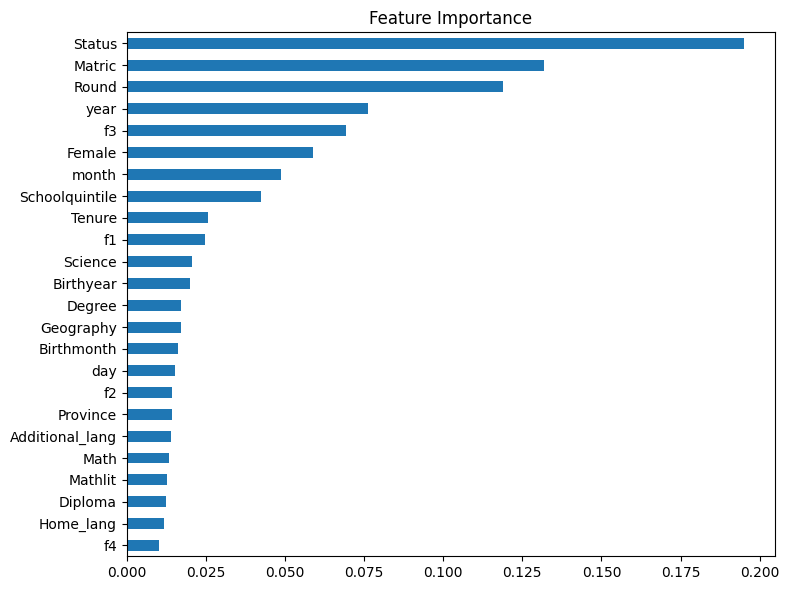

Status             0.195122
Matric             0.131762
Round              0.118808
year               0.076352
f3                 0.069193
Female             0.058848
month              0.048652
Schoolquintile     0.042511
Tenure             0.025679
f1                 0.024690
Science            0.020535
Birthyear          0.019815
Degree             0.016994
Geography          0.016963
Birthmonth         0.016119
day                0.015360
f2                 0.014208
Province           0.014148
Additional_lang    0.013951
Math               0.013238
Mathlit            0.012578
Diploma            0.012519
Home_lang          0.011895
f4                 0.010059
dtype: float32


In [40]:
features = df.drop(columns=['Target'])
target = df['Target']

model =XGBClassifier(random_state=42)
model.fit(features, target)

importances = pd.Series(model.feature_importances_, index=features.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title("Feature Importance")
plt.tight_layout()
plt.show()
print(importances.sort_values(ascending=False))

we see that our feature eng  have a good importanc in the model 
Key Drivers:
Status (0.195): Current job or study status matters most. Focus on supporting people based on their current situation
Matric (0.132): Passing high school is a big factor. Hire or train people with matric, or support education programs
Round (0.119): Survey timing affects results. Adjust hiring or programs based on survey rounds
my  Features:
f3 (0.069): This is the best  best engineered feature. Use it to guide decisions 
f1 (0.025): Has some impact. Check what it means and see if you can make it better
f2 (0.014) and f4 (0.010): These don’t help much. Focus on other areas unless you can improve them.
Other Factors:
Female (0.059): Gender matters. Support women with job opportunities
Schoolquintile (0.043): Poorer schools mean less chance of employment Help those from lower quintiles with jobs or training.
What to Do:
Focus on education (matric) and current status to improve hiring
Using f3 to make decisions
Support women and people from poorer schools to boost employment.

In [41]:
feat = feature(df)
df = feat.engenerig()


In [42]:
dc=df.copy()
featur = [
    'Status', 'Matric', 'Round', 'year', 'f3', 'Female', 'month',
    'Schoolquintile', 'Tenure', 'f1', 'Science', 'Birthyear', 'Degree',
    'Geography', 'Birthmonth', 'day', 'f2', 'Province', 'Additional_lang',
    'Math', 'Mathlit', 'Diploma', 'Home_lang', 'f4'
]




In [43]:
X = dc[featur]
y = dc["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
random_model = XGBClassifier(n_estimators=700, learning_rate=0.01, max_depth=15, subsample=0.90, colsample_bytree=0.9,
   
    min_child_weight=1,
    reg_lambda=1,
    gamma=0.5,
    reg_alpha=0.01,
    scale_pos_weight=1,  
    max_delta_step=3,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42)  
random_model.fit(X_train, y_train)


y_pred = random_model.predict(X_test)
test_f1 = f1_score(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Test F1 Score: {test_f1}")


Accuracy: 0.892399658411614
Test F1 Score: 0.8921232876712328


[LightGBM] [Info] Number of positive: 2927, number of negative: 2927
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1615
[LightGBM] [Info] Number of data points in the train set: 5854, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


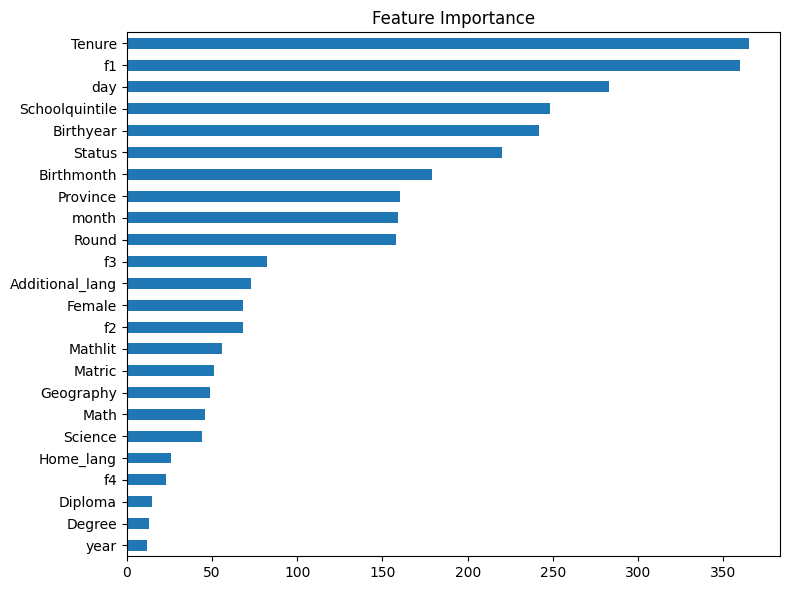

Tenure             365
f1                 360
day                283
Schoolquintile     248
Birthyear          242
Status             220
Birthmonth         179
Province           160
month              159
Round              158
f3                  82
Additional_lang     73
f2                  68
Female              68
Mathlit             56
Matric              51
Geography           49
Math                46
Science             44
Home_lang           26
f4                  23
Diploma             15
Degree              13
year                12
dtype: int32


In [44]:
features = df.drop(columns=['Target'])
target = df['Target']

model =LGBMClassifier(random_state=42)
model.fit(features, target)

importances = pd.Series(model.feature_importances_, index=features.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title("Feature Importance")
plt.tight_layout()
plt.show()
print(importances.sort_values(ascending=False))

I’ve got this model to predict if South African youth get jobs in a year. Here’s my take, keeping it real simple:

Tenure (365): How long someone’s been working or studying matters most. I’ll hire people with longer tenures or help others stay in jobs longer.
f1 (360): My f1 feature is almost as big. I’ll check what it is and use it a lot since it’s so important.
day (283): The survey day makes a difference. I’ll look at the best days for hiring trends.
Schoolquintile (248): Kids from richer schools do better. I’ll help those from poorer schools with jobs or training.
Status (220): If they’re working or studying now, they’re more likely to get a job later. I’ll help the unemployed with training.
f3 (82): My f3 is doing okay. I’ll use it more and see how to make it better.
f2 (68) and f4 (23): These features I made aren’t great. I won’t focus on them unless I can improve them.
Female (68): Gender matters. I’ll make sure women get fair job chances.